In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [3]:
%pwd

'/Users/sreekailash/Documents/MSBAIM/Fall Module 2/MGMT 590 Web data/Final Project'

In [72]:
df = pd.read_csv('books_upated_2.csv', index_col = 0)

In [73]:
df.shape

(52478, 21)

In [74]:
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description', 'isbn',
       'genres', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate',
       'firstPublishDate', 'awards', 'numRatings', 'ratingsByStars',
       'likedPercent', 'coverImg', 'price', 'to-read'],
      dtype='object')

In [75]:
df.head(2)

,bookId,title,series,author,rating,description,isbn,genres,bookFormat,edition,...,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,coverImg,price,to-read
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,First Edition,...,Scholastic Press,9/14/08,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,https://i.gr-assets.com/images/S/compressed.ph...,5.09,"1,191,638"
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",Paperback,US Edition,...,Scholastic Inc.,9/28/04,6/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,https://i.gr-assets.com/images/S/compressed.ph...,7.38,"373,361"


# Data transformation

In [76]:
df.drop(['bookId', 'series', 'isbn', 'bookFormat', 'edition',
                   'publishDate', 'awards', 'ratingsByStars', 'likedPercent', 
                   'coverImg'], inplace = True, axis = 1)

In [77]:
df.head()

,title,author,rating,description,genres,pages,publisher,firstPublishDate,numRatings,price,to-read
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,NaN,6376780,5.09,"1,191,638"
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,6/21/03,2507623,7.38,"373,361"
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",324,Harper Perennial Modern Classics,7/11/60,4501075,NaN,"1,784,906"
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",279,Modern Library,1/28/13,2998241,NaN,"1,585,240"
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",10/5/05,4964519,2.1,"4,716"


In [78]:
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors = 'coerce')

In [79]:
df['description_num_words'] = df['description'].str.split().str.len()

In [80]:
def getPolarity(text):
    try:
        polarity = TextBlob(text).sentiment.polarity
    except:
        polarity = None
    return polarity

df['description_sentiment'] = df['description'].apply(getPolarity)

In [81]:
def polarity_detection(x):
    if x < 0:
        return "Negative"
    elif x > 0:
        return "Positive"
    else: 
        return "Neutral"

df['description_sentiment_polarity'] = df['description_sentiment'].apply(polarity_detection)


In [82]:
df['to-read'] = df['to-read'].str.replace(',','')

In [83]:
df.head()

,title,author,rating,description,genres,pages,publisher,firstPublishDate,numRatings,price,to-read,description_num_words,description_sentiment,description_sentiment_polarity
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,NaT,6376780,5.09,1191638,147.0,0.072786,Positive
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,2003-06-21,2507623,7.38,373361,136.0,-0.087273,Negative
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",324,Harper Perennial Modern Classics,2060-07-11,4501075,NaN,1784906,137.0,0.165686,Positive
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,"['Classics', 'Fiction', 'Romance', 'Historical...",279,Modern Library,2013-01-28,2998241,NaN,1585240,100.0,0.475556,Positive
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",2005-10-05,4964519,2.1,4716,55.0,0.184659,Positive


In [84]:
df.isna().sum()

title                                 0
author                                0
rating                                0
description                        1338
genres                                0
pages                              2347
publisher                          3696
firstPublishDate                  21395
numRatings                            0
price                             14365
to-read                             546
description_num_words              1338
description_sentiment              1338
description_sentiment_polarity        0
dtype: int64

In [85]:
df.columns

Index(['title', 'author', 'rating', 'description', 'genres', 'pages',
       'publisher', 'firstPublishDate', 'numRatings', 'price', 'to-read',
       'description_num_words', 'description_sentiment',
       'description_sentiment_polarity'],
      dtype='object')

In [86]:
df = df[df['price'].isna() == False]
df.shape

(38113, 14)

In [87]:
genres_list = ['Fiction', 'Romance', 'Fantasy', 'Contemporary', 
              'Nonfiction', 'Historical Fiction', 'Mystery', 'Adult', 'Paranormal',
             'Science Fiction']

for i in genres_list:
    df[i] = df['genres'].apply(lambda x: 1 if i in x else 0)


In [88]:
df.head()

,title,author,rating,description,genres,pages,publisher,firstPublishDate,numRatings,price,...,Fiction,Romance,Fantasy,Contemporary,Nonfiction,Historical Fiction,Mystery,Adult,Paranormal,Science Fiction
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,NaT,6376780,5.09,...,1,1,1,0,0,0,0,1,0,1
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,2003-06-21,2507623,7.38,...,1,0,1,0,0,0,0,1,0,1
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",2005-10-05,4964519,2.1,...,1,1,1,0,0,0,0,1,1,0
5,The Book Thief,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,"['Historical Fiction', 'Fiction', 'Young Adult...",552,Alfred A. Knopf,2005-09-01,1834276,3.8,...,1,0,0,0,0,1,0,1,0,0
6,Animal Farm,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",141,Signet Classics,2045-08-17,2740713,4.42,...,1,0,1,0,0,0,0,0,0,1


In [63]:
df.to_csv('input_df.csv')

In [96]:
df['to-read'] = pd.to_numeric(df['to-read'])

# PRIORITISATION

In [105]:
genres_dict = {}

In [182]:
len(df[(df['Science Fiction'] == 1) & (df['Mystery'] == 1)])

840

In [123]:
for i in genres_list:
    genres_dict[i] = round(df[df[i] == 1]['to-read'].mean(),2)

In [177]:
genres_count = {}

for i in genres_list:
    genres_count[i] = len(df[df[i] == 1])

In [146]:
genres_std = {}

for i in genres_list:
    genres_std[i] = (df[df[i] == 1]['to-read'].std())

In [183]:
genres_count

{'Fiction': 27127,
 'Romance': 10379,
 'Fantasy': 11885,
 'Contemporary': 7358,
 'Nonfiction': 7048,
 'Historical Fiction': 6654,
 'Mystery': 6458,
 'Adult': 15396,
 'Paranormal': 4251,
 'Science Fiction': 5340}

In [135]:
del genres_count['Fiction']

In [136]:
del genres_dict['Fiction']

In [ ]:
del genres_std['Fiction']

In [137]:
genres_df = pd.DataFrame(genres_dict.items(), columns=['Genres', 'Avg.to_read'])

In [175]:
df.shape

(38113, 24)

In [176]:
genres_df

,Genres,Avg.to_read
0,Paranormal,14029.74
1,Mystery,14104.49
2,Fantasy,15845.23
3,Historical Fiction,15941.98
4,Romance,16141.63
5,Nonfiction,16224.63
6,Science Fiction,16725.11
7,Contemporary,18432.41
8,Adult,20036.09


In [140]:
genres_count_df = pd.DataFrame(genres_count.items(), columns=['Genres', 'Count'])

In [147]:
genres_std_df = pd.DataFrame(genres_std.items(), columns=['Genres', 'Std'])

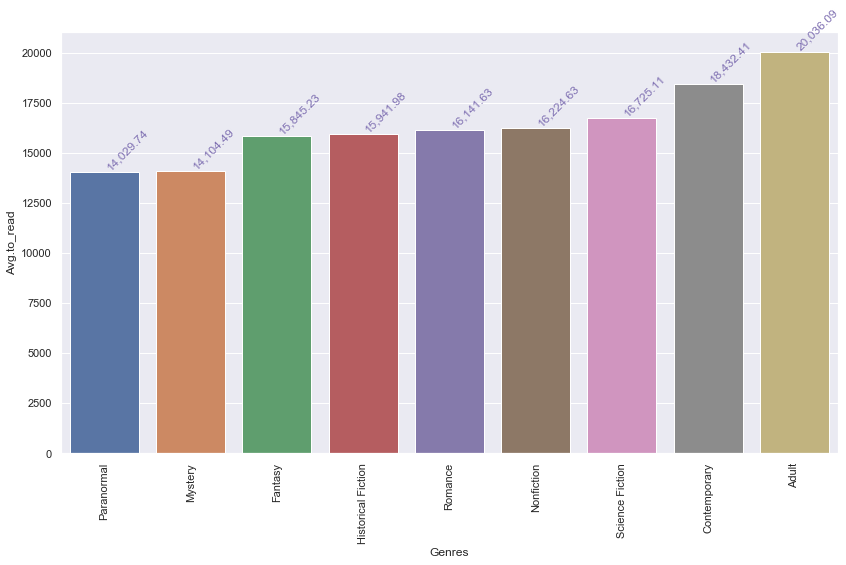

In [138]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

genres_df = genres_df.sort_values(['Avg.to_read']).reset_index(drop=True)

plt.figure(figsize=(12,8))
# plot barh chart with index as x values
ax = sns.barplot(genres_df['Genres'], genres_df['Avg.to_read'])
ax.set(xlabel="Genres", ylabel='Avg.to_read')
# add proper Dim values as x labels
ax.set_xticklabels(genres_df['Genres'])
    for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(genres_df["Avg.to_read"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()



Are any of these differences statistically significant to motivate action?

# DESIGN

## Num of pages

In [191]:
df['pages'] = pd.to_numeric(df['pages'].str.replace('page',''))

AttributeError: Can only use .str accessor with string values!

In [167]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

/Users/sreekailash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/sreekailash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


(0, 2000)

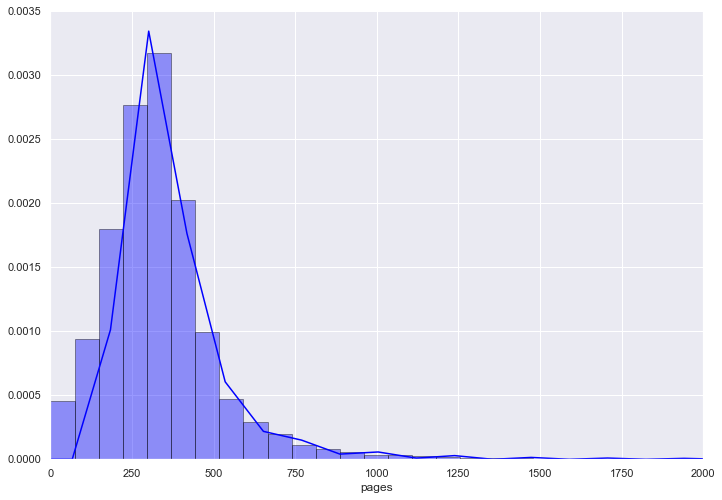

In [173]:
sns.distplot(df[~is_outlier(df['pages'])]['pages'], hist=True, kde=True, 
             bins=int(1000/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.xlim(0,2000)

R shows statistically significant impact of number of pages on to read count (positive correlation)

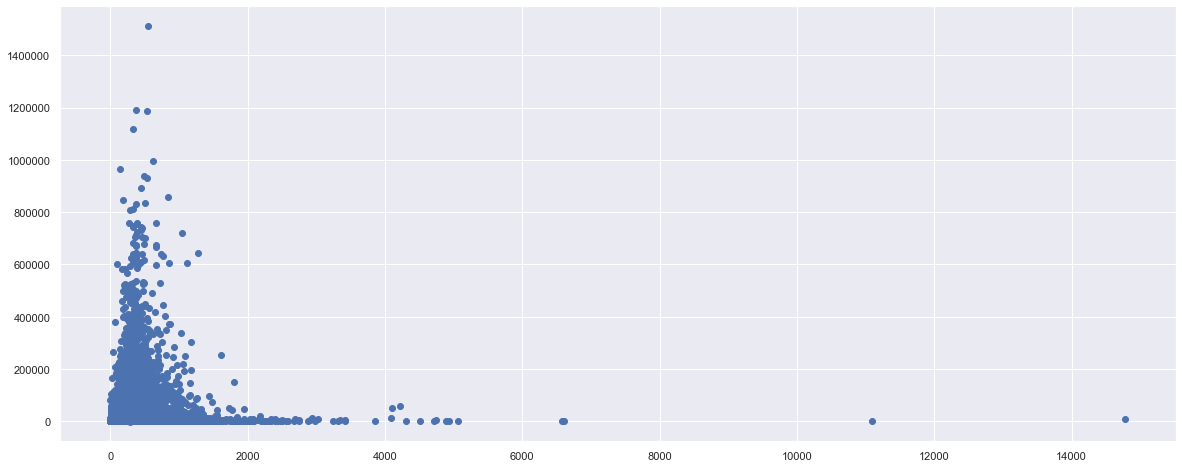

In [187]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['pages'], df['to-read'])
plt.show()

In [189]:
df.head()

,title,author,rating,description,genres,pages,publisher,firstPublishDate,numRatings,price,...,Fiction,Romance,Fantasy,Contemporary,Nonfiction,Historical Fiction,Mystery,Adult,Paranormal,Science Fiction
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374.0,Scholastic Press,NaT,6376780,5.09,...,1,1,1,0,0,0,0,1,0,1
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870.0,Scholastic Inc.,2003-06-21,2507623,7.38,...,1,0,1,0,0,0,0,1,0,1
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501.0,"Little, Brown and Company",2005-10-05,4964519,2.1,...,1,1,1,0,0,0,0,1,1,0
5,The Book Thief,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,"['Historical Fiction', 'Fiction', 'Young Adult...",552.0,Alfred A. Knopf,2005-09-01,1834276,3.8,...,1,0,0,0,0,1,0,1,0,0
6,Animal Farm,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",141.0,Signet Classics,2045-08-17,2740713,4.42,...,1,0,1,0,0,0,0,0,0,1


In [197]:
pages_bin = {'cutoff':[], 'lesser_count':[], 'lesser_to_read':[], 
             'greater_equal_count':[], 'greater_equal_to_read':[]}

for i in range(0,int(max(df['pages'])),50):
    pages_bin['cutoff'].append(i)
    pages_bin['lesser_count'].append(len(df[df['pages'] < i]))
    pages_bin['lesser_to_read'].append(df[df['pages'] < i]['to-read'].mean())
    pages_bin['greater_equal_count'].append(len(df[df['pages'] >= i]))
    pages_bin['greater_equal_to_read'].append(df[df['pages'] >= i]['to-read'].mean())
    
pages_bin

{'cutoff': [0,
  50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000,
  1050,
  1100,
  1150,
  1200,
  1250,
  1300,
  1350,
  1400,
  1450,
  1500,
  1550,
  1600,
  1650,
  1700,
  1750,
  1800,
  1850,
  1900,
  1950,
  2000,
  2050,
  2100,
  2150,
  2200,
  2250,
  2300,
  2350,
  2400,
  2450,
  2500,
  2550,
  2600,
  2650,
  2700,
  2750,
  2800,
  2850,
  2900,
  2950,
  3000,
  3050,
  3100,
  3150,
  3200,
  3250,
  3300,
  3350,
  3400,
  3450,
  3500,
  3550,
  3600,
  3650,
  3700,
  3750,
  3800,
  3850,
  3900,
  3950,
  4000,
  4050,
  4100,
  4150,
  4200,
  4250,
  4300,
  4350,
  4400,
  4450,
  4500,
  4550,
  4600,
  4650,
  4700,
  4750,
  4800,
  4850,
  4900,
  4950,
  5000,
  5050,
  5100,
  5150,
  5200,
  5250,
  5300,
  5350,
  5400,
  5450,
  5500,
  5550,
  5600,
  5650,
  5700,
  5750,
  5800,
  5850,
  5900,
  5950,
  6000,
  6050,
  6100,
  6150,
  6200,
  6250,
  630

In [199]:
pages_bin_df = pd.DataFrame.from_dict(pages_bin,orient='index').transpose()
pages_bin_df

,cutoff,lesser_count,lesser_to_read,greater_equal_count,greater_equal_to_read
0,0.0,0.0,NaN,37432.0,13996.134444
1,50.0,825.0,5473.583026,36607.0,14187.153503
2,100.0,1955.0,5943.657541,35477.0,14439.650669
3,150.0,3931.0,7164.872078,33501.0,14797.330612
4,200.0,7148.0,8158.019649,30284.0,15372.211482
...,...,...,...,...,...
291,14550.0,37431.0,13996.212242,1.0,11111.000000
292,14600.0,37431.0,13996.212242,1.0,11111.000000
293,14650.0,37431.0,13996.212242,1.0,11111.000000
294,14700.0,37431.0,13996.212242,1.0,11111.000000


In [201]:
pages_bin_df['lesser_count_perc'] = pages_bin_df['lesser_count']/sum(pages_bin_df['lesser_count'],pages_bin_df['greater_equal_count'])
pages_bin_df['greater_count_perc'] = pages_bin_df['greater_equal_count']/sum(pages_bin_df['lesser_count'],pages_bin_df['greater_equal_count'])



In [203]:
pages_bin_df.to_csv('pages_bin.csv')

In [204]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'pandas',
 'numpy',
 'matplotlib.pyplot',
 'seaborn',
 'researchpy',
 'scipy.stats',
 'types']